<a href="https://colab.research.google.com/github/billycemerson/quantitative-finance-project/blob/main/01_foundations/return_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Outline:
-  Simple returns vs Log returns
- Cumulative returns
- Rolling returns (30D, 60D, 90D)
- Annualized returns
- Return distributions (normality tests)

#### Get Data

In [ ]:
data = yf.download("BBCA.JK", start="2021-01-01", end="2024-12-31", interval="1d",
                   progress=False, auto_adjust=False)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
Date,,,,,,
2021-01-04,6028.374023,6835.0,6855.0,6720.0,6800.0,47937000
2021-01-05,6253.282227,7090.0,7090.0,6850.0,6860.0,104831000
2021-01-06,6125.393555,6945.0,7075.0,6880.0,7050.0,89753500
2021-01-07,6143.033203,6965.0,7050.0,6910.0,7000.0,71360000
2021-01-08,6218.001465,7050.0,7080.0,6975.0,7035.0,75033500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 969 entries, 2021-01-04 to 2024-12-30
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BBCA.JK)  969 non-null    float64
 1   (Close, BBCA.JK)      969 non-null    float64
 2   (High, BBCA.JK)       969 non-null    float64
 3   (Low, BBCA.JK)        969 non-null    float64
 4   (Open, BBCA.JK)       969 non-null    float64
 5   (Volume, BBCA.JK)     969 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 53.0 KB


#### Simple Return & Log Return

In [ ]:
# Calculate simple return
data["simple_return"] = (data["Adj Close"] / data["Adj Close"].shift(1)) - 1
data.dropna(inplace=True)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,
Date,,,,,,,
2021-01-05,6253.282227,7090.0,7090.0,6850.0,6860.0,104831000,0.037308
2021-01-06,6125.393555,6945.0,7075.0,6880.0,7050.0,89753500,-0.020451
2021-01-07,6143.033203,6965.0,7050.0,6910.0,7000.0,71360000,0.002880
2021-01-08,6218.001465,7050.0,7080.0,6975.0,7035.0,75033500,0.012204
2021-01-11,6478.187988,7345.0,7360.0,7145.0,7150.0,169034500,0.041844


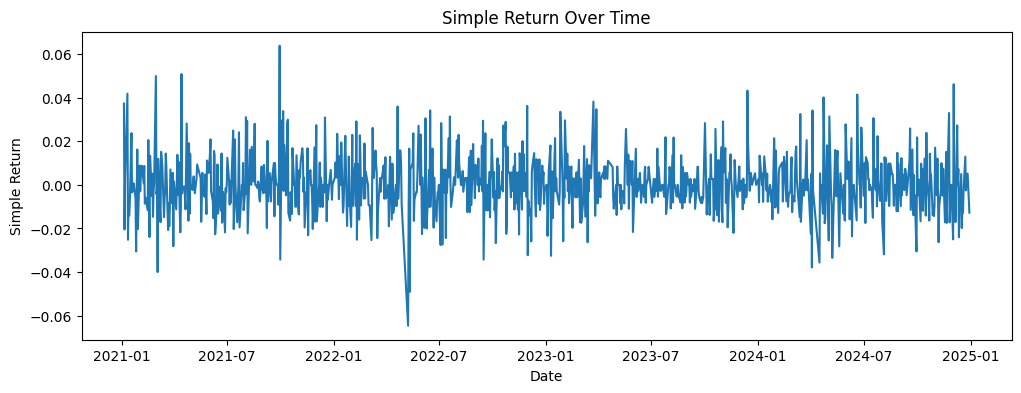

In [ ]:
# Plot the simple return
plt.figure(figsize=(12,4))
plt.plot(data.index, data['simple_return'])
plt.title("Simple Return Over Time")
plt.xlabel("Date")
plt.ylabel("Simple Return")
plt.show()

In [ ]:
# Calculate log return
data["log_return"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))
data.dropna(inplace=True)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,,
Date,,,,,,,,
2021-01-06,6125.393555,6945.0,7075.0,6880.0,7050.0,89753500,-0.020451,-0.020663
2021-01-07,6143.033203,6965.0,7050.0,6910.0,7000.0,71360000,0.002880,0.002876
2021-01-08,6218.001465,7050.0,7080.0,6975.0,7035.0,75033500,0.012204,0.012130
2021-01-11,6478.187988,7345.0,7360.0,7145.0,7150.0,169034500,0.041844,0.040992
2021-01-12,6315.020020,7160.0,7380.0,7160.0,7345.0,95235000,-0.025187,-0.025510


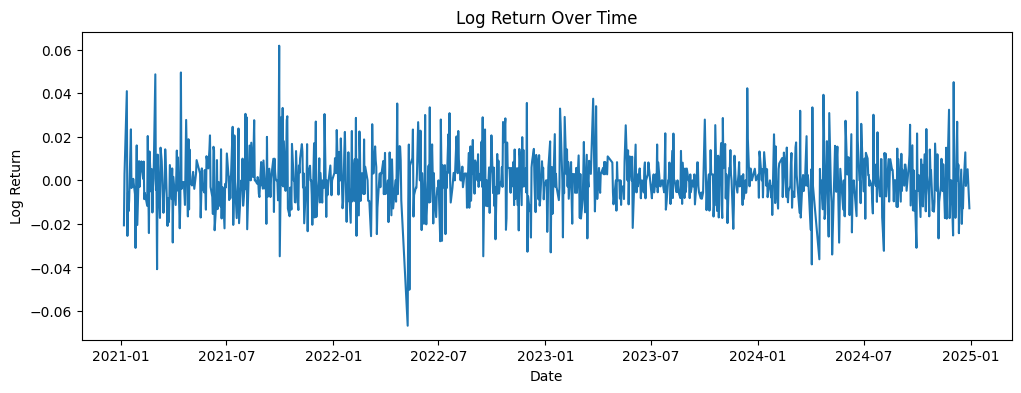

In [ ]:
# Plot the log return
plt.figure(figsize=(12,4))
plt.plot(data.index, data['log_return'])
plt.title("Log Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()

#### Cumulative Returns

In [ ]:
# Calculate cumulative return
data["cum_return"] = (1 + data["simple_return"]).cumprod()
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return,cum_return
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,,,
Date,,,,,,,,,
2021-01-06,6125.393555,6945.0,7075.0,6880.0,7050.0,89753500,-0.020451,-0.020663,0.979549
2021-01-07,6143.033203,6965.0,7050.0,6910.0,7000.0,71360000,0.002880,0.002876,0.982369
2021-01-08,6218.001465,7050.0,7080.0,6975.0,7035.0,75033500,0.012204,0.012130,0.994358
2021-01-11,6478.187988,7345.0,7360.0,7145.0,7150.0,169034500,0.041844,0.040992,1.035966
2021-01-12,6315.020020,7160.0,7380.0,7160.0,7345.0,95235000,-0.025187,-0.025510,1.009873


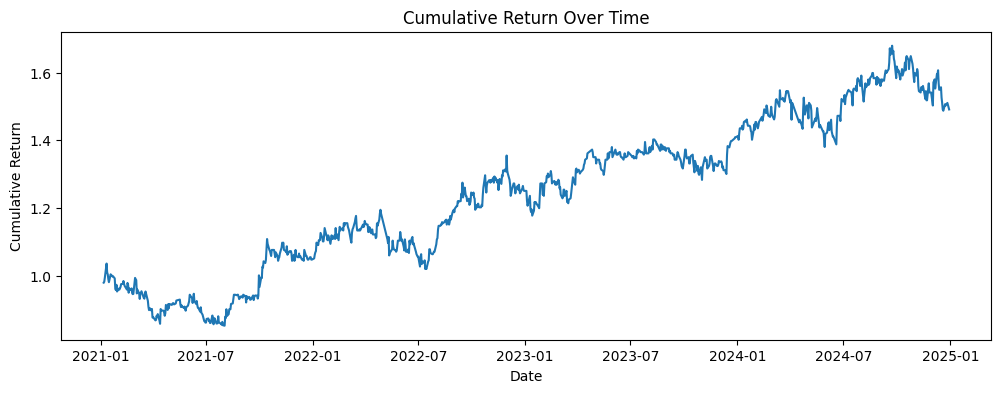

In [ ]:
# Plot cumulative return
plt.figure(figsize=(12,4))
plt.plot(data.index, data['cum_return'])
plt.title("Cumulative Return Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

#### Rolling Returns (30D, 60D, 90D)

In [ ]:
# 30D rolling returns
data["30d_rolling_return"] = data["simple_return"].rolling(window=30).mean()
data.dropna(inplace=True)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return,cum_return,30d_rolling_return
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,,,,
Date,,,,,,,,,,
2021-02-17,6085.704102,6900.0,6960.0,6850.0,6890.0,66011500,-0.005764,-0.005780,0.973202,-0.000798
2021-02-18,5940.175293,6735.0,6900.0,6735.0,6850.0,91204000,-0.023913,-0.024204,0.949929,-0.000913
2021-02-19,6019.555176,6825.0,6850.0,6760.0,6780.0,70487500,0.013363,0.013275,0.962623,-0.000563
2021-02-22,5988.684570,6790.0,6940.0,6790.0,6900.0,68913000,-0.005128,-0.005142,0.957687,-0.001141
2021-02-23,6019.555176,6825.0,6845.0,6775.0,6820.0,58360000,0.005155,0.005142,0.962623,-0.002364


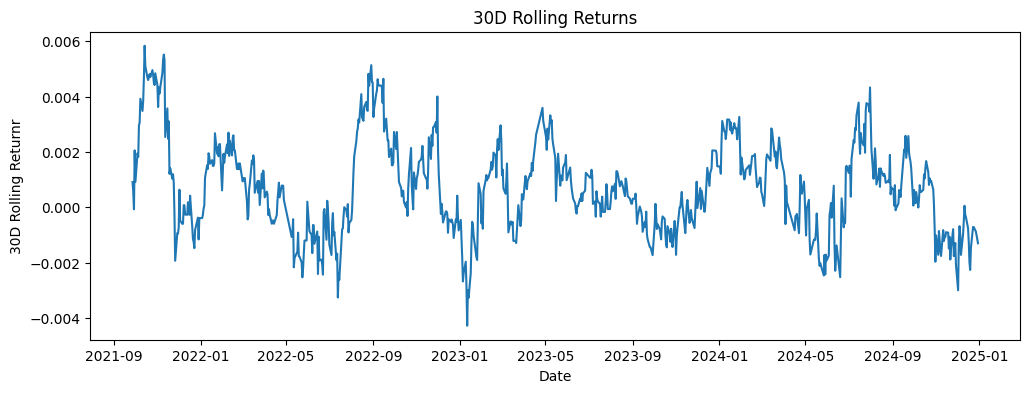

In [ ]:
# Plot 30D rolling returns
plt.figure(figsize=(12,4))
plt.plot(data.index, data['30d_rolling_return'])
plt.title("30D Rolling Returns")
plt.xlabel("Date")
plt.ylabel("30D Rolling Returnr")
plt.show()

In [ ]:
# 60D rolling returns
data["60d_rolling_return"] = data["simple_return"].rolling(window=60).mean()
data.dropna(inplace=True)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return,cum_return,30d_rolling_return,60d_rolling_return
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,,,,,
Date,,,,,,,,,,,
2021-05-18,5714.893555,6390.0,6455.0,6365.0,6400.0,73563000,-0.016923,-0.017068,0.913903,0.001490,-0.001023
2021-05-19,5674.646973,6345.0,6400.0,6335.0,6380.0,64912500,-0.007042,-0.007067,0.907467,0.001202,-0.001044
2021-05-20,5705.950684,6380.0,6435.0,6350.0,6390.0,64950000,0.005516,0.005501,0.912473,0.001760,-0.000554
2021-05-21,5688.062988,6360.0,6450.0,6260.0,6450.0,92620000,-0.003135,-0.003140,0.909612,0.001602,-0.000829
2021-05-24,5656.760742,6325.0,6380.0,6290.0,6355.0,59210000,-0.005503,-0.005518,0.904607,0.000959,-0.000835


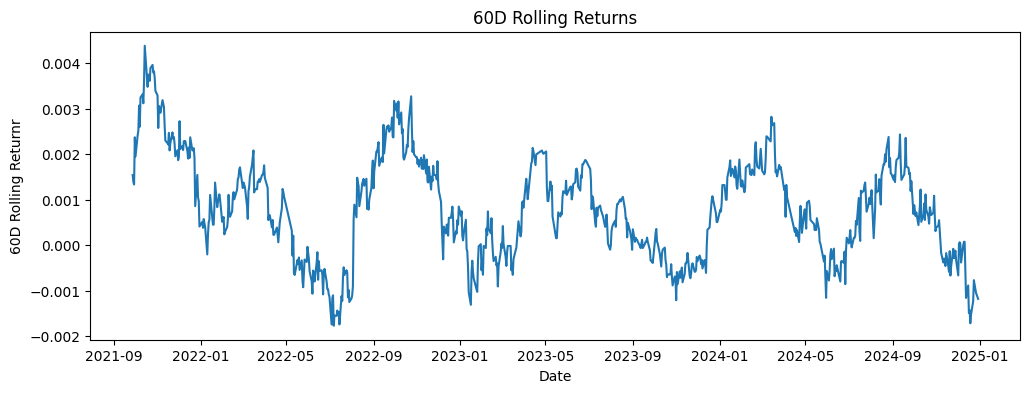

In [ ]:
# Plot 60D rolling returns
plt.figure(figsize=(12,4))
plt.plot(data.index, data['60d_rolling_return'])
plt.title("60D Rolling Returns")
plt.xlabel("Date")
plt.ylabel("60D Rolling Returnr")
plt.show()

In [ ]:
# 90D rolling returns
data["90d_rolling_return"] = data["simple_return"].rolling(window=90).mean()
data.dropna(inplace=True)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return,cum_return,30d_rolling_return,60d_rolling_return,90d_rolling_return
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,,,,,,
Date,,,,,,,,,,,,
2021-09-27,5884.819824,6580.0,6595.0,6555.0,6585.0,55052500,-0.000759,-0.000760,0.941077,0.000913,0.001542,0.000208
2021-09-28,5831.159180,6520.0,6560.0,6500.0,6540.0,80186000,-0.009118,-0.009160,0.932496,0.000557,0.001390,0.000295
2021-09-29,5884.819824,6580.0,6580.0,6515.0,6520.0,74079000,0.009202,0.009160,0.941077,-0.000070,0.001335,0.000475
2021-09-30,6260.446777,7000.0,7000.0,6595.0,6600.0,156848000,0.063830,0.061875,1.001146,0.002057,0.002372,0.001123
2021-10-01,6045.803223,6760.0,6900.0,6710.0,6900.0,103954500,-0.034286,-0.034887,0.966821,0.000914,0.001951,0.000777


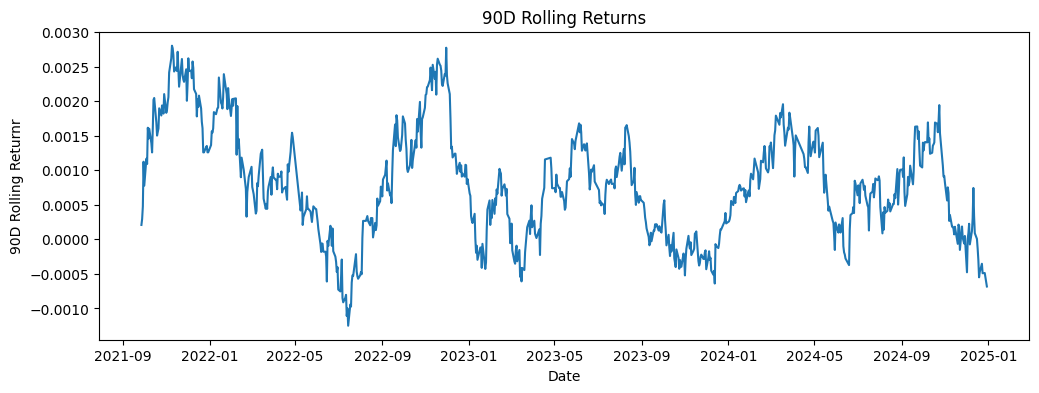

In [ ]:
# Plot 90D rolling returns
plt.figure(figsize=(12,4))
plt.plot(data.index, data['90d_rolling_return'])
plt.title("90D Rolling Returns")
plt.xlabel("Date")
plt.ylabel("90D Rolling Returnr")
plt.show()

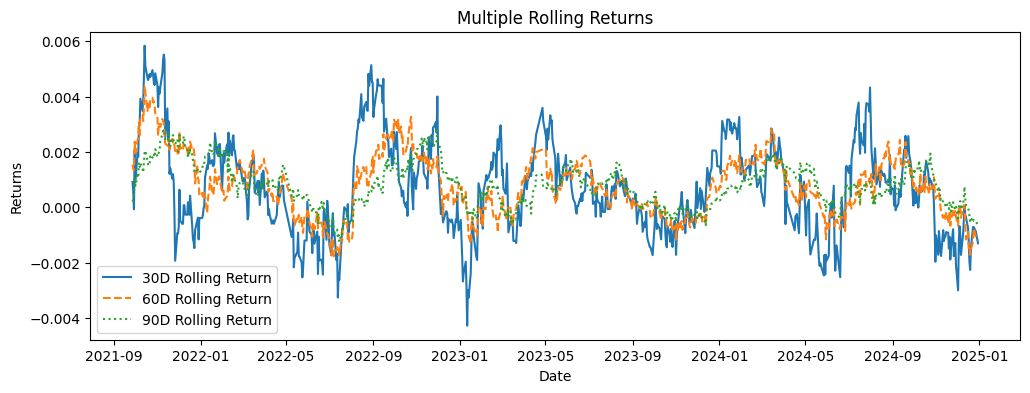

In [ ]:
# Compare 30D,60D,and 90D Rolling Returns
plt.figure(figsize=(12,4))
plt.plot(data.index, data['30d_rolling_return'], label='30D Rolling Return', linestyle='-')
plt.plot(data.index, data['60d_rolling_return'], label='60D Rolling Return', linestyle='--')
plt.plot(data.index, data['90d_rolling_return'], label='90D Rolling Return', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Multiple Rolling Returns')
plt.legend()
plt.show()

#### Annualized Returns

In [ ]:
# Calculated annualized returns
annualized_return = (data["cum_return"].iloc[-1] ** (252/len(data))) - 1
annualized_return

np.float64(0.1359277036848956)

#### Return distributions (normality tests)

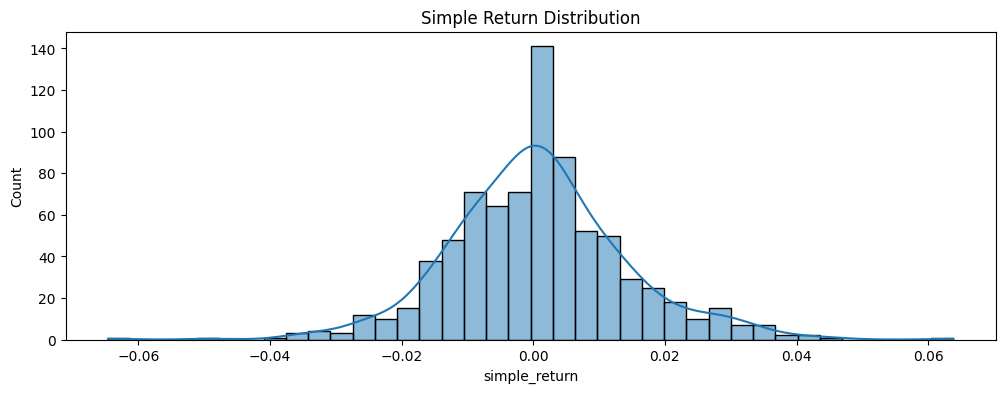

In [ ]:
# Return distributions
plt.figure(figsize=(12,4))
sns.histplot(data["simple_return"], kde=True)
plt.title("Simple Return Distribution")
plt.show()

In [ ]:
# Return normality test
from scipy.stats import normaltest
stat, p = normaltest(data["simple_return"])

In [ ]:
stat

np.float64(37.25325310062168)

In [ ]:
p

np.float64(8.138771820560356e-09)